# Fashion MNIST 데이터셋 알아보기

In [ ]:
#torch.utils.data : 데이터셋의 표준을 정의, 데이터셋을 불러오고 자르고 섞는데 쓰는 도구들이 들어있는 모듈
#파이토치 모델을 학습시키기 위한 데이터셋의 표준을 torch.utils.data.Dataset에 정의
#Dataset 모듈을 상속하는 파생 클래스는 학습에 필요한 데이터셋을 로딩해주는 torch.utils.DataLoader 인스턴스의 입력으로 사용할 수 있음\

#torchvision.datasets : torch.utils.data.Dataset을 상속하는 이미지 데이터셋의 모음. 패션 아이템 데이터셋이 바로 여기에 들어있음

#torchvision.transforms : 이미지 데이터셋에 쓸 수 있는 여러가지 변환 필터를 담고있는 모듈.
#ex) 텐서로 변환, resizr, crop, brightness, contrast등

#torchvision.utils : 이미지 데이터를 저장하고 시각화 하기 위한 도구가 들어있는 모듈

In [2]:
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

## Fashion MNIST 데이터셋

In [3]:
#이미지를 텐서로 바꿔주는 코드
#transforms에는 ToTensor, Resizr, Normalize, RandomHorizonFlip, RandomCrop 같은 함수들이 있다. 
#Compose()함수 안의 리스트에 넣어주면 순서대로 변환이 이루어진다.
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
#torchvision의 datasets 패키지는 데이터셋을 내려받고, Compose로 만들어 둔 이미지 변환 설정을 적용하는데 쓰인다.
#download=True 한줄만 넣고 root로 지정한 폴더에 데이터셋이 존재하는지 확인한 후 없다면 자동으로 저장된다.
#학습용과 테스트용으로 나뉘어져 있으므로 train 매개변수에 True나 False를 주어 선택

trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [6]:
#torchvision.dataset으로 생성된 객체는 파이토치 내부 클래스 torch.utils.data.Dataset을 상속하므로, DataLoader에 바로 넣어 사용할 수 있다. 
#DataLoader는 데이터셋을 batch단위로 쪼개고 학습시 반복문 안에서 데이터를 공급해주는 클래스
batch_size = 16 #반복마다 16개의 이미지를 읽어온다.

train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

In [12]:
dataiter       = iter(train_loader) #iter()함수를 이용해 반복문 안에서 이용할 수 있게 만들어줌 
images, labels = next(dataiter) #next()함수로 16개를 가져옴

## 멀리서 살펴보기


torch.Size([3, 56, 224])


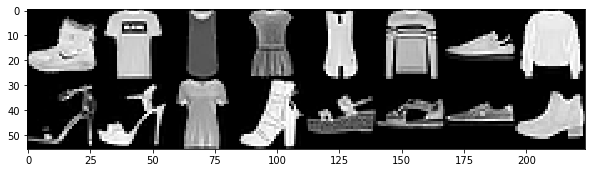

In [40]:
img   = utils.make_grid(images, padding=0) #여러 이미지를 모아 하나의 이미지로 만들기. 
print(img.shape) #3:?색깔인가, 56:28*2, 224:28*8
npimg = img.numpy() #img는 파이토치 텐서. 맷플롯립에서 호환되는 넘파이 행렬로 바꿔주기
plt.figure(figsize=(10, 7)) #이미지가 들어갈 자리를 만든다.
#print(npimg[1].shape)
#print(npimg)
plt.imshow(np.transpose(npimg, (1,2,0))) #맷플롯립에서 인식하는 차원의 순서가 다르므로 np.transpose()로 첫번째(0번째) 차원을 맨 뒤로 보낸다.
#print(np.transpose(npimg, (1,2,0)).shape)
#print(np.transpose(npimg, (1,2,0)))
plt.show()

In [14]:
print(labels) #각 이미지의 클래스

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [15]:
CLASSES = { #숫자로 표시된 클래스를 읽기 편하게 딕셔너리로 만들어 준다.
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


이미지의 데이터는 가로, 세로, 색상으로 구성된 3차원 행렬로 표현됨
이미지의 크기 28*28 채널은 1가지
입력 x의 특징값의 개수는 784개
## 가까이서 살펴보기


torch.Size([1, 28, 28])
torch.Size([16, 1, 28, 28])
(28, 28)


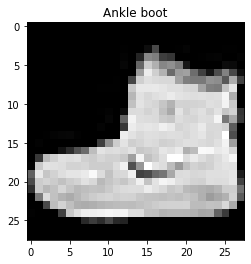

In [29]:
idx = 0

item_img = images[idx] #첫번째 이미지 꺼내기
print(item_img.shape)
print(images.shape)
item_npimg = item_img.squeeze().numpy() #맷플롯립에서 이용가능한 넘파이 행렬을 만들기
plt.title(CLASSES[labels[idx].item()]) #라벨을 제목으로
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

# 심층 인공 신경망(DNN, Deep Neural Network)

In [34]:
import torch
import torch.nn as nn #신경망 모델의 재료를 담고있는 nn모듈
import torch.optim as optim 
import torch.nn.functional as F #nn모듈의 함수버전
from torchvision import transforms, datasets #토치비전의 데이터셋을 다루기 위한 것들

In [35]:
USE_CUDA = torch.cuda.is_available() #CUDA용 파이토치와 CUDA가 설치돼있으면 True반환
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

EPOCHS = 30
BATCH_SIZE = 64

In [36]:
#모델 설계
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256) #Linear클래스 : 선형결합을 수행하는 객체
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    def forward(self,x):
        x = x.view(-1, 784) #입력을 1차원 행렬로 만든다.
        x = F.relu(self.fc1(x)) #이전장과 달리 relu()함수는 가중치가 없는 연산이기 때문에 nn.functional에 있는 함수를 사용한다.
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
#모델 선언
model = Net().to(DEVICE) #모델의 파라미터들을 지정한 장치의 메모리로 보낸다. 
#최적화 알고리즘 
optimizer = optim.SGD(model.parameters(), lr=0.01) #model.parameters() 모델 내부의 정보를 넘겨준다.

In [37]:
def train(model, train_loader, optimizer):
    model.train() #학습모드
    #모델에 입력할 data의 shape는 [배치크기, 색, 높이, 너비]로 이루어짐
    #data.size()로 출력해보면 [64,1,28,28]이라고 표시된다.
    #모델의 가중치가 gpu로 보내졌다면 학습데이터도 같은 장치로 보내야한다.
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)

        optimizer.zero_grad() #반복 때마다 기울기를 새로 계산
        output = model(data)
        loss = F.cross_entropy(output, target) #가중치가 필요 없으므로 nn.CrossEntropyLoss로 criterion()함수를 만들지 않고 F.cross_entropy()함수 직접 사용. loss는 미니배치 64개의 오차평균
        loss.backward() #기울기 계산
        optimizer.step() #가중치 갱신

In [38]:
#성능측정
#일반화 오류(generalization error) : 모델이 학습하지 않은 데이터에 얼마나 적응하는지 나타낸 수치. 학습과 실제 성능의 괴리이므로 작을수록 좋다.
#학습용 데이터 : 가중치 조절
#검증 데이터 : 배치크기와 모델설계와 같은 하이퍼파라미터 조절에 사용
#테스트 데이터 : 성능보고에 사용
def evaluate(model, test_loader): #일반화 평가, 학습종료시점 파악용도
    model.eval() # 평가 모드
    test_loss = 0 #테스트 오차
    correct = 0 #예측이 맞은 수
    #기울기 계산 불필요
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item() #미니배치의 평균대신 합을 받는다.
            pred = output.max(1, keepdim=True)[1] #output.max()는 가장 큰 값, 그 값의 인덱스 두개 반환. 여기선 인덱스를 사용한다.
            correct += pred.eq(target.view_as(pred)).sum().item() #예측값과 정답을 비교해(eq():1/0출력) sum()으로 0/1배열의 값을 모두 합친다. view_as는 target텐서를 pred와 같은 모양으로 만든다.
        test_loss /= len(test_loader.dataset)
        test_accuracy = 100. * correct / len(test_loader.dataset)
        return test_loss, test_accuracy

In [39]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5649, Accuracy: 80.33%
[2] Test Loss: 0.4895, Accuracy: 82.54%
[3] Test Loss: 0.4526, Accuracy: 83.67%
[4] Test Loss: 0.4266, Accuracy: 84.67%
[5] Test Loss: 0.4087, Accuracy: 85.27%
[6] Test Loss: 0.3911, Accuracy: 85.88%
[7] Test Loss: 0.3791, Accuracy: 86.36%
[8] Test Loss: 0.3694, Accuracy: 86.63%
[9] Test Loss: 0.3622, Accuracy: 86.88%
[10] Test Loss: 0.3567, Accuracy: 87.18%
[11] Test Loss: 0.3509, Accuracy: 87.40%
[12] Test Loss: 0.3481, Accuracy: 87.40%
[13] Test Loss: 0.3455, Accuracy: 87.63%
[14] Test Loss: 0.3444, Accuracy: 87.71%
[15] Test Loss: 0.3384, Accuracy: 87.94%
[16] Test Loss: 0.3370, Accuracy: 88.12%
[17] Test Loss: 0.3354, Accuracy: 88.27%
[18] Test Loss: 0.3348, Accuracy: 88.22%
[19] Test Loss: 0.3343, Accuracy: 88.29%
[20] Test Loss: 0.3344, Accuracy: 88.30%
[21] Test Loss: 0.3337, Accuracy: 88.29%
[22] Test Loss: 0.3326, Accuracy: 88.40%
[23] Test Loss: 0.3335, Accuracy: 88.37%
[24] Test Loss: 0.3330, Accuracy: 88.54%
[25] Test Loss: 0.3329, A

# Overfitting & Dropout
검증 성능이 나빠지기 전에 모델을 저장하여 이용하는 것 : early stopping
## 학습데이터를 늘리기 data augmentation
## 드롭아웃 적용하기

In [ ]:
#Data augmentation
#한번에 적기
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        './.data', 
        train=True, 
        download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(), 
            transform.ToTensor(), 
            transforms.Normalize((0.1307,),(0.3081,))
            ])), 
        batch_size=BATCH_SIZE, 
        suffle=True
)
#나눠서 적기
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), 
    transform.ToTensor(), 
    transforms.Normalize((0.1307,),(0.3081,))
])

testset = datasets.MNIST(
    root        = './.data', 
    train       = Flase, 
    download    = True, 
    transform   = transform
)

test_loader = torch.utils.data.DataLoader( 
    dataset     = testset, 
    batch_size  = BATCH_SIZE, 
    suffle      = True
)

In [ ]:
#Dropout 적용
class Net(nn.Module):
    def __init__(self, dropout_p=0.2): #학습시 20%의 뉴런을 사용하지 않겠다
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        #--------------------------
        self.dropout_p = dropout_p#
        #--------------------------
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        #----------------------------------------------------------
        x = F.dropout(x, training=self.training, p=self.dropout_p)#가중치가 없으므로 nn.functional에서 함수를 바로가져와 사용가능
        #----------------------------------------------------------원하면 nn.Dropout클래스를 사용해도 무방. 어차피 F.dropout()함수를 쓰며 self.training 등 몇가지 내부 변수를 자동으로 적용해주는 모둘임
        #학습모드 model.train()함수를 통해 모드를 바꾸면 self.training 변수의 값이 True가 된다. 
        #평가모드일 때는 False가 된다.
        x = F.relu(self.fc2(x))
        #----------------------------------------------------------
        x = F.dropout(x, training=self.training, p=self.dropout_p)#
        #----------------------------------------------------------
        x = self.fc3(x)
        return x

In [ ]:
model = Net(dropout_p=0.2).to(DEVICE)
#최고 성능에 수렴하는 시간이 길어지기에 epoch를 늘려야함